# Customer Segmentation using Clustering


## Data

The dataset (can be found [here](http://archive.ics.uci.edu/ml/datasets/online+retail)) contains all the transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

THe columns of the dataset consists of the following:
- **InvoiceNo**: A unique identifier for the invoice. An invoice number shared across rows means that those transactions were performed in a single invoice (multiple purchases).
- **StockCode**: Identifier for items contained in an invoice.
- **Description**: Textual description of each of the stock item.
- **Quantity**: The quantity of the item purchased.
- **InvoiceDate**: Date of purchase.
- **UnitPrice**: Value of each item.
- **CustomerID**: Identifier for customer

In [60]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 250)


# makes plots nice
def make_pretty(ax, title='', x_label='', y_label='', img=False):
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(x_label, fontsize=16)
    ax.set_ylabel(y_label, fontsize=16)
    ax.legend(loc='best', fontsize=16)
    if img:
        ax.axis('off')
    return ax

In [61]:
data = pd.read_csv("online_retail.csv",encoding = "ISO-8859-1")

In [62]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Data cleaning, subsetting & Feature Creation

In this exercise, we will focus on customers that are based in United Kingdom. 

**To do**:
- select the rows that corresponds to customers based in the United Kigndom
- removes rows that contain null values

In [63]:

data = data[data['Country'] == 'United Kingdom']
data.dropna(inplace=True)


The goal of customer segmentation is to group customers that share similar profile. The dataset that we have consists of only the sales transactions of the customers and no other additional information about its customers. So we will create three features that capture the behaviors of each customer, using RFM — Recency, Frequency and Monetary Value — based model of customer value.

According to this [article](https://www.optimove.com/resources/learning-center/rfm-segmentation),
> - Recency: How much time has elapsed since a customer’s last activity or transaction with the brand 
> - Frequency: How often has a customer transacted or interacted with the brand during a particular period of time?
> - Monetary: Also referred to as “monetary value,” this factor reflects how much a customer has spent with the brand during a particular period of time

In the main dataframe, we will create two columns that will help us create the attributes: recency and monetary. 

**To do**:
- create a column labeled as "monetary" that contains the total price: qunatity * unit price for each row.
- remove any rows that contains "monetary" values that are strictly less than 0.

In [64]:
print(len(data))
data['monetary'] = data['Quantity'] * data['UnitPrice']
data = data[data['monetary'] >= 0]
print(len(data['monetary']))


361878
354345


**To do**:
create a column that represents the number of days elapsed since the last the last transaction:
- convert the date column to a datetime object
- find the reference date based on which you will compute the number of days elapsed: max date + dt.timedelta(days=1)
- create the column labeled as recency that contains the number of days between the reference date and the date on invoice

In [65]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print(data['InvoiceDate'].max())
reference = data['InvoiceDate'].max() + dt.timedelta(days=1)
print(reference)
data['recency'] = reference - data['InvoiceDate']


2011-12-09 12:49:00
2011-12-10 12:49:00


In [66]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,monetary,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,374 days 04:23:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374 days 04:23:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,374 days 04:23:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374 days 04:23:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374 days 04:23:00
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,374 days 04:23:00
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,374 days 04:23:00
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,374 days 04:21:00
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,374 days 04:21:00
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,374 days 04:15:00


**To do**
Create a new dataframe that has contains the three attributes: recency, monetary and frequency for each customer.
- Group the rows of the main dataframe by customer id and then aggregate the column "monetary" by summing its entries, the column "recency" by computing the minimum of its entries and the column "customer id" by computing the count of its entries (this is goign to be the frequency attributes).

*Consider using groupby followed by agg (as shown in the last example [here](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html))*

In [74]:
#  group_2 = df.groupby('mentioned').agg({
#         "upvote_ratio": "mean",  # average the 'upvote_ratio' column
#         "score": "mean",  # average the 'score' column
#         "new_date": "min",  # take the minimum value of the 'new_date' column
#     })


df = data.groupby('CustomerID').agg({
    "monetary" : "sum",
    "recency" : "min",
    "CustomerID": "count"   
})
df

,monetary,recency,CustomerID
CustomerID,,,
12346.0,77183.60,326 days 02:48:00,1
12747.0,4196.01,2 days 22:15:00,103
12748.0,33719.73,1 days 00:29:00,4596
12749.0,4090.88,4 days 02:53:00,199
12820.0,942.34,3 days 21:37:00,59
...,...,...,...
18280.0,180.60,278 days 02:57:00,10
18281.0,80.82,181 days 01:56:00,7
18282.0,178.05,8 days 01:06:00,12


In [78]:
# you can change the label the columns as follows (make sure to change the order)
df.columns = ["value", "recency", "frequency"]

df.columns

df['recency'] = df['recency'].apply(lambda x: x.days)

In [79]:
df.head()

,value,recency,frequency
CustomerID,,,
12346.0,77183.60,326,1
12747.0,4196.01,2,103
12748.0,33719.73,1,4596
12749.0,4090.88,4,199
12820.0,942.34,3,59


In the next questions, focus on using the dataframe that was just created.

## Additional feature transformation

**To do**
- Plot the histogram of each single feature ("frequency", "monetary", "recency") and [the scatter plot of the data in 3D](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html). Any observations?
- Now apply the log transformation to each feature (make sure to add 0.001 to the values in the column monetary before you apply the log transformation). And then plot again the same figures. Any observations? What is the implication of applyin log trasnformation?

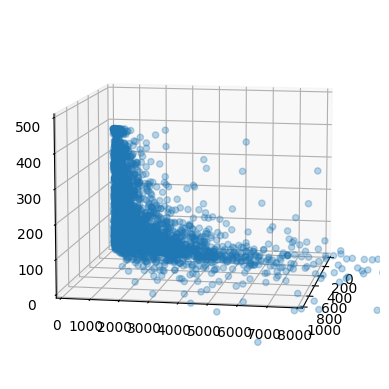

In [93]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(10, 10, 0)
ax.set_xlim(0, 1000)
ax.set_ylim(0,8000)
ax.set_zlim(0,500)
ax.scatter(df['frequency'], df['value'], df['recency'])

In [ ]:
def make_hist(ax, col, df):
    print(f'Min of {col}: {df[col].min()}')
    print(f'Max of {col}: {df[col].max()}')
    ax = df[col].plot(kind='hist', ax=ax)
    make_pretty(ax, f'{col} Histogram', col, 'Frequency')
    
    


## K-Means Clustering

Recall that in K-Means Clustering we want to *minimize* the distance between data points and the respective centroid for the cluster they are in.

### Choosing K: The Elbow Sum-of-Squares (SS) Method 
**To do**: (sample code can be found in the slides on clustering)
- Write code that applies the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method from scikit-learn to this matrix. 
- Construct a plot showing $SS$ or inertia for each $K$ and pick $K$ using this plot. For simplicity, test $2 \le K \le 10$. What challenges did you experience using the Elbow method to pick $K$?


### Choosing K: The Silhouette Method

Scikit-learn provides a function to compute the silhouette score [`sklearn.metrics.silhouette_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). 

**To do**:
- Compute the average silhouette score for each $K$ and plot it. What $K$ does the plot suggest we should choose? Does it differ from what we found using the Elbow method?

- *Optional*: Using the documentation for the `silhouette_score` construct a series of silhouette plots like the ones in this [article](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

## Visualizing Clusters using 3D scatter plot and PCA

Scatter plot in 3D:
- Scale the log-trasnformed data using a standard scaler from sklearn
- Cluster your scaled data using the value of $K$ you obtained from the Silhouette method.
- Plot the 3D scatter plot of the data and color the samples according to the clustering labels.
- Can you tell a story about the clusters?


Use PCA to plot your clusters:
- Scale the log-trasnformed data using a standard scaler from sklearn
- Cluster your data using the value of $K$ you obtained from the Silhouette method
- Use scikit-learn's [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function to reduce the dimensionality of your data to 2 components
- How much variance the 2 components explain?
- Create a data frame with the following fields:
  - cluster id the customer belongs to
  - the two columns of the projected data (label them `x` and `y`)
  
- Plot a scatterplot of the `x` vs `y` columns
- Color-code points differently based on cluster ID
- How do the clusters look? Check the weights of the first principal component
- Repeat the same steps using the second best $K$ you obtained from the Silhouetter method.
